In [1]:

import numpy as np
import pandas as pd
import seaborn as sns


from moseq2_lda.data import load_representations
from moseq2_lda.model import create_lda_pipeline, run_cross_validation, train_lda_pipeline
from moseq2_lda.viz import plot_lda_results, plot_validation_curve, plot_permutation_score
#%matplotlib qt

In [2]:
model_file = r"F:\moseq\2021-01-15_Meloxicam\2022-09-02_moseq\models\rOT_model_1000-1.fixed.p"
index_file = r"F:\moseq\2021-01-15_Meloxicam\2022-09-02_moseq\moseq2-index.role.yaml"

max_syllable = 73

#groups = ['baseline', '4hrs carrageenan', '24hrs saline', '24hrs meloxicam', 'baseline meloxicam']
#palette = sns.color_palette(['#35fab3', '#ff8400', '#f06493', '#020887', '#647aa3'])
#markers = ['o', 's', '^', 'P', 'X']


#groups = ['baseline', '4hrs carrageenan', '24hrs carrageenan + saline']
#palette = sns.color_palette(['#35fab3', '#ff8400', '#f06493'])
#markers = ['o', 's', '^']
#groups = None
#groups = ['baseline', '4hrs carrageenan', '24hrs carrageenan', '6d carrageenan', '14d carrageenan']

#groups = ['baseline', '4hrs carrageenan', '24hrs carrageenan', '6d carrageenan', '14d carrageenan', '24hrs carrageenan + saline', '24hrs carrageenan + meloxicam']
#palette = sns.color_palette('deep', n_colors=len(groups))
#markers = ['o', 'v', '^', '<', '>', 's', 'p', 'P', 'D', 'X', '*', 'h', 'H', 'd'][:len(groups)]

groups = [
    'CAR bsl + saline',
    'CAR bsl + mel',
    'CAR 4h',
    'CAR 24h + saline',
    'CAR 24h + mel',
    'CAR 6d',
    'CAR 14d',

    'CAR ctrl bsl',
    'CAR ctrl 4h',
    'CAR ctrl 24h',
    'CAR ctrl 6d',
    'CAR ctrl 14d',
]


#exclude_uuids = [] # [
#    '2e4fb355-0907-4c6c-9318-11556620a9c0'
#]

In [3]:
representations = load_representations(index_file, model_file, max_syllable=max_syllable, groups=groups)
#groups = list(set(representations.groups))
palette = sns.color_palette('deep', n_colors=len(groups))
marker_pool = ['o', 'v', '^', '<', '>', 's', 'p', 'P', 'D', 'X', '*', 'h', 'H', 'd']
markers = [marker_pool[i % len(marker_pool)] for i in range(len(groups))]
len(markers)

pruned 2496 transitions which are never used


12

Best value for parameter "shrinkage" is 0.10, achieving a mean accuracy of ~30.9% ± 7.87% (stdev) on cross-validated data
Below are performance metrics for estimator using best parameter trained on the entire training dataset and evaluated on held out test data (not used in cross-validation)
                  precision    recall  f1-score   support

         CAR 14d       0.20      0.17      0.18         6
   CAR 24h + mel       0.25      0.33      0.29         3
CAR 24h + saline       0.00      0.00      0.00         3
          CAR 4h       0.18      0.33      0.24         6
          CAR 6d       0.25      0.17      0.20         6
   CAR bsl + mel       0.33      0.33      0.33         3
CAR bsl + saline       1.00      0.33      0.50         3
    CAR ctrl 14d       1.00      0.33      0.50         3
    CAR ctrl 24h       0.50      0.67      0.57         3
     CAR ctrl 4h       1.00      0.33      0.50         3
     CAR ctrl 6d       0.40      0.67      0.50         3
    CAR ct

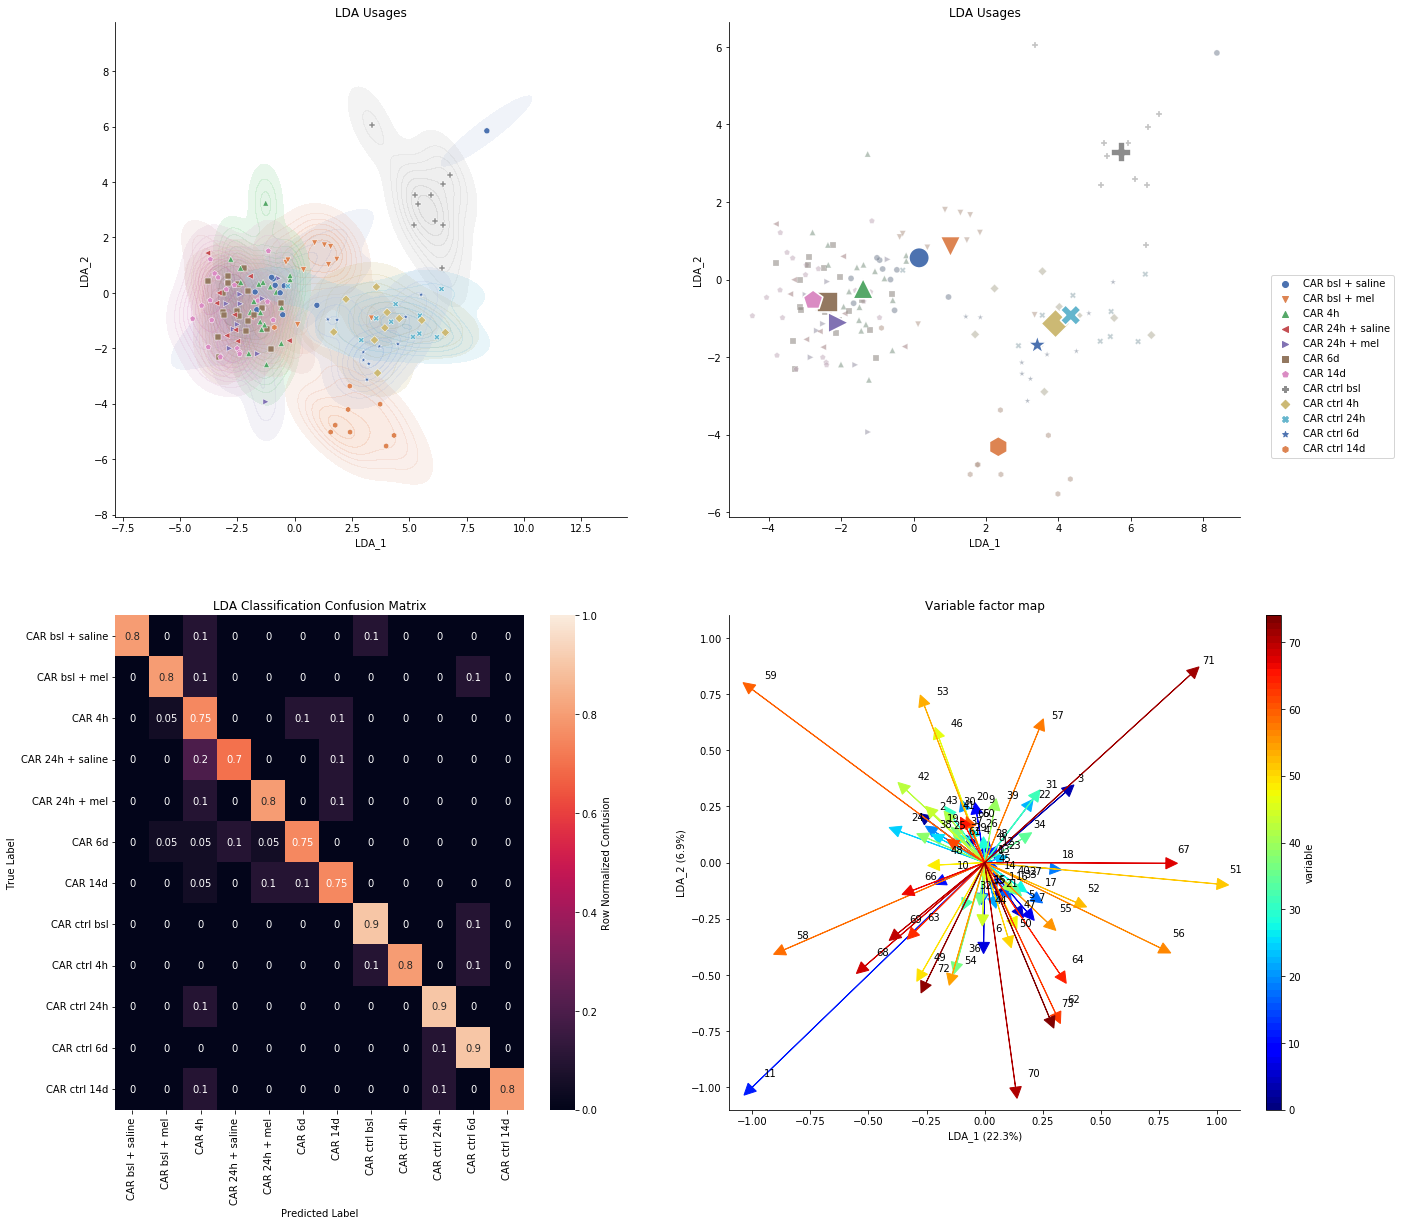

In [4]:
results = train_lda_pipeline(representations, 'usage')

fig, axs, df = plot_lda_results(results.estimator, representations.usage, representations.meta, representations.groups, groups, palette, markers, title='LDA Usages')

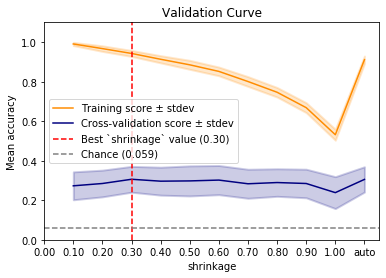

In [13]:
plot_validation_curve(results.cv_result)

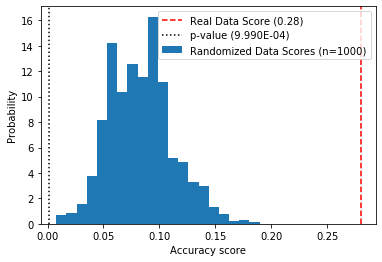

In [6]:
plot_permutation_score(results.estimator, results.data.usage, results.data.groups)